In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

#importing the required libraries

import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# Tumor - 0
# Normal - 1

OneHotEncoder()

In [4]:
# This cell updates result list for images containing the tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/INTERNSHIP/Code Clause/tumor detection/Brain_Tumor_Dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
# encode img without tumor
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/INTERNSHIP/Code Clause/tumor detection/Brain_Tumor_Dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [6]:
#data list for storing image data in numpy array form

data = np.array(data)
data.shape

(139, 128, 128, 3)

In [7]:
#result list for storing one hot encoded form of target class whether normal or tumor

result = np.array(result)
result = result.reshape(139,2)

In [8]:
#splitting the data set into training and testing sets

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [9]:

#building a CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8256      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        1

In [10]:

y_train.shape

(111, 2)

In [11]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/10
3/3 [==============================] - 6s 621ms/step - loss: 32.5867 - val_loss: 143.2513
Epoch 2/10
3/3 [==============================] - 0s 80ms/step - loss: 17.4035 - val_loss: 10.9923
Epoch 3/10
3/3 [==============================] - 0s 71ms/step - loss: 2.5541 - val_loss: 11.7575
Epoch 4/10
3/3 [==============================] - 0s 71ms/step - loss: 2.0865 - val_loss: 2.1590
Epoch 5/10
3/3 [==============================] - 0s 79ms/step - loss: 0.4158 - val_loss: 5.2162
Epoch 6/10
3/3 [==============================] - 0s 71ms/step - loss: 0.7071 - val_loss: 5.0548
Epoch 7/10
3/3 [==============================] - 0s 72ms/step - loss: 0.5512 - val_loss: 3.3582
Epoch 8/10
3/3 [==============================] - 0s 71ms/step - loss: 0.1852 - val_loss: 1.9265
Epoch 9/10
3/3 [==============================] - 0s 69ms/step - loss: 0.0678 - val_loss: 1.1392
Epoch 10/10
3/3 [==============================] - 0s 74ms/step - loss: 0.0671 - val_loss: 0.8257


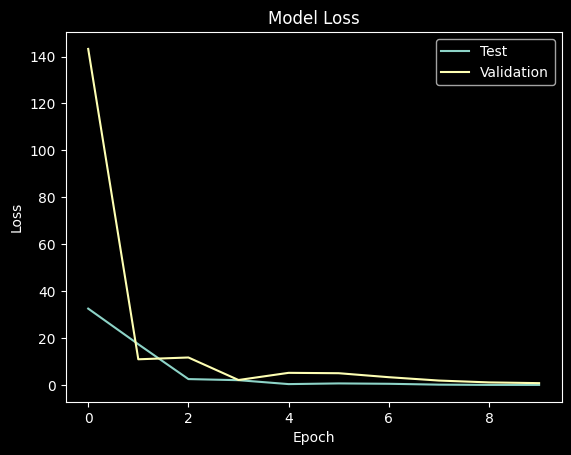

In [12]:
#plotting the losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [13]:
model.save('/content/drive/MyDrive/INTERNSHIP/Code Clause/tumor detection/saved_model')

## Making Predictions

In [14]:

def names(number):
    if number==0:
        return 'TUMOR DETECTED'
    else:
        return 'NO TUMOR DETECTED'

NO TUMOR DETECTED


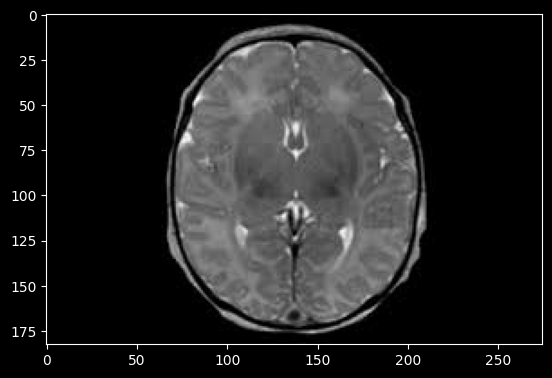

In [15]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/INTERNSHIP/Code Clause/tumor detection/Brain_Tumor_Dataset/no/12 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))

TUMOR DETECTED


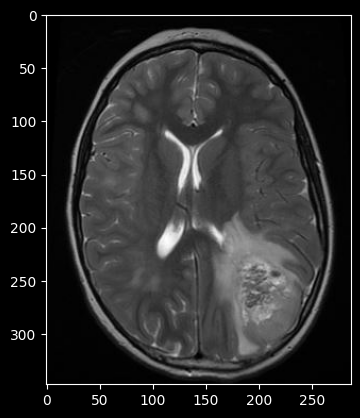

In [19]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/INTERNSHIP/Code Clause/tumor detection/Brain_Tumor_Dataset/yes/Y100.JPG")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(names(classification))